#### Michelle Rice

## DSC550

## Term Project Milestone 4 
##### Updates made this week are at the bottom 

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# read the csv file
hr_data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
# view the top few rows of the file
hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
## Drop unnecessary features

## Since there are multiple ways that rate is recorded, and it is unclear how they are all calculated, I have decided
## to use only HourlyRate and drop DailyRate, MonthlyRate, MonthlyIncome

## EmployeeCount is 1 for all records, I do not see value in keeping this

## EmployeNumber is not important to my analysis so I will drop that

## Standard Hours is the same for all records and therefore has no impact and can be dropped

## Over18 has Y for all records, which is not accurate and not needed since we have an age column

## Since the study is in regard to employee happines in their job and how we can change that,
## I am eliminating features related to personal situation and happiness such as marital status, 
## that are out of the control of the company relationship satisfaction, distance from home

## I am removing Job Involvement since I'm not sure what exactly that is measuring

hr_data = hr_data.drop(columns=['DailyRate', 'EmployeeCount', 'EmployeeNumber', 'StandardHours',
                                'MonthlyIncome', 'MonthlyRate', 'Over18', 'EducationField', 
                               'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
                               'YearsWithCurrManager', 'MaritalStatus', 'DistanceFromHome', 'TotalWorkingYears',
                               'Education', 'JobInvolvement'])

In [5]:
# check the dataframe to see that features have been dropped
hr_data.head()

,Age,Attrition,BusinessTravel,Department,EnvironmentSatisfaction,Gender,HourlyRate,JobLevel,JobRole,JobSatisfaction,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,41,Yes,Travel_Rarely,Sales,2,Female,94,2,Sales Executive,4,8,Yes,11,3,1,6,4,0
1,49,No,Travel_Frequently,Research & Development,3,Male,61,2,Research Scientist,2,1,No,23,4,3,10,7,1
2,37,Yes,Travel_Rarely,Research & Development,4,Male,92,1,Laboratory Technician,3,6,Yes,15,3,3,0,0,0
3,33,No,Travel_Frequently,Research & Development,4,Female,56,1,Research Scientist,3,1,Yes,11,3,3,8,7,3
4,27,No,Travel_Rarely,Research & Development,1,Male,40,1,Laboratory Technician,2,9,No,12,3,3,2,2,2


In [6]:
## Changing values with names to numeric values (BusinessTravel, Gender, Attrition, Department, JobRole, OverTime)

hr_data['BusinessTravel'] = hr_data['BusinessTravel'].replace(['Non-Travel', 'Travel_Rarely', 'Travel_Frequently'], ['1', '2','3'])
hr_data['Gender'] = hr_data['Gender'].replace(['Male', 'Female'], [0, 1])
hr_data['Attrition'] = hr_data['Attrition'].replace(['No', 'Yes'], [0, 1])
hr_data['Department'] = hr_data['Department'].replace(['Human Resources', 'Research & Development', 'Sales'], ['1', '2', '3'])
hr_data['JobRole'] = hr_data['JobRole'].replace(['Healthcare Representative', 'Human Resources', 'Laboratory Technician', 'Manager', 'Manufacturing Director', 'Research Director', 'Research Scientist', 'Sales Executive', 'Sales Representative'], ['1', '2', '3', '4', '5', '6', '7', '8', '9'])
hr_data['OverTime'] = hr_data['OverTime'].replace(['No', 'Yes'], [0, 1])

In [7]:
# check data to see values are changed
hr_data.head()

,Age,Attrition,BusinessTravel,Department,EnvironmentSatisfaction,Gender,HourlyRate,JobLevel,JobRole,JobSatisfaction,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,41,1,2,3,2,1,94,2,8,4,8,1,11,3,1,6,4,0
1,49,0,3,2,3,0,61,2,7,2,1,0,23,4,3,10,7,1
2,37,1,2,2,4,0,92,1,3,3,6,1,15,3,3,0,0,0
3,33,0,3,2,4,1,56,1,7,3,1,1,11,3,3,8,7,3
4,27,0,2,2,1,0,40,1,3,2,9,0,12,3,3,2,2,2


In [8]:
## determine which columns have missing values and how many
hr_data.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
EnvironmentSatisfaction    0
Gender                     0
HourlyRate                 0
JobLevel                   0
JobRole                    0
JobSatisfaction            0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
WorkLifeBalance            0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
dtype: int64

In [9]:
hr_data.isnull().values.any()

False

In [10]:
## I do not see any missing values and therefore do not need to fill any data

In [11]:
# create a new column from the HourlyRate that groups the rates: group 1 = 0-40, 2 = 41-60, 3 = 61-80, 4 = 81-100

hr_data['SalaryRange'] = pd.cut(hr_data.HourlyRate, bins=[0,40,60,80,100], labels=[1,2,3,4])


In [12]:
hr_data.head()

,Age,Attrition,BusinessTravel,Department,EnvironmentSatisfaction,Gender,HourlyRate,JobLevel,JobRole,JobSatisfaction,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,SalaryRange
0,41,1,2,3,2,1,94,2,8,4,8,1,11,3,1,6,4,0,4
1,49,0,3,2,3,0,61,2,7,2,1,0,23,4,3,10,7,1,3
2,37,1,2,2,4,0,92,1,3,3,6,1,15,3,3,0,0,0,4
3,33,0,3,2,4,1,56,1,7,3,1,1,11,3,3,8,7,3,2
4,27,0,2,2,1,0,40,1,3,2,9,0,12,3,3,2,2,2,1


In [13]:
hr_data.describe()

,Age,Attrition,EnvironmentSatisfaction,Gender,HourlyRate,JobLevel,JobSatisfaction,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,2.721769,0.400000,65.891156,2.063946,2.728571,2.693197,0.282993,15.209524,3.153741,2.761224,7.008163,4.229252,2.187755
std,9.135373,0.367863,1.093082,0.490065,20.329428,1.106940,1.102846,2.498009,0.450606,3.659938,0.360824,0.706476,6.126525,3.623137,3.222430
min,18.000000,0.000000,1.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,2.000000,0.000000,48.000000,1.000000,2.000000,1.000000,0.000000,12.000000,3.000000,2.000000,3.000000,2.000000,0.000000
50%,36.000000,0.000000,3.000000,0.000000,66.000000,2.000000,3.000000,2.000000,0.000000,14.000000,3.000000,3.000000,5.000000,3.000000,1.000000
75%,43.000000,0.000000,4.000000,1.000000,83.750000,3.000000,4.000000,4.000000,1.000000,18.000000,3.000000,3.000000,9.000000,7.000000,3.000000
max,60.000000,1.000000,4.000000,1.000000,100.000000,5.000000,4.000000,9.000000,1.000000,25.000000,4.000000,4.000000,40.000000,18.000000,15.000000


In [14]:
## chi-square test to determine which features are more important
from sklearn.feature_selection import chi2

In [15]:
X = hr_data.drop('Attrition',axis=1)
y = hr_data['Attrition']

In [16]:
chi_scores = chi2(X,y)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


In [17]:
chi_scores

(array([8.41552768e+01, 3.21645728e+00, 7.41254268e-01, 6.89059434e+00,
        7.65129816e-01, 4.31779090e-01, 2.49392423e+01, 7.35482992e+00,
        7.01194663e+00, 6.43865444e+00, 6.38450667e+01, 2.35026858e-01,
        5.06064443e-04, 1.08554296e+00, 1.42100054e+02, 1.17522596e+02,
        7.60172347e+00, 7.17535596e-02]),
 array([4.57401507e-20, 7.29012494e-02, 3.89259387e-01, 8.66504535e-03,
        3.81727912e-01, 5.11117265e-01, 5.91657487e-07, 6.68828366e-03,
        8.09675971e-03, 1.11663196e-02, 1.34598985e-15, 6.27821283e-01,
        9.82052402e-01, 2.97460858e-01, 9.24706566e-33, 2.20572828e-27,
        5.83125339e-03, 7.88800503e-01]))

In [18]:
# generate p values
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

<AxesSubplot:>

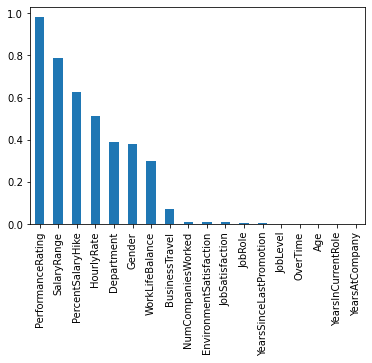

In [19]:
# plot p values
p_values.plot.bar()

In [20]:
## Variables with higher p-values should be considered independent of the dependent variable (Attrition).  
## I would like to continue to look at this and determine if other methods agree


## Model Evaluation

### Split the data into Training and Test sets

In [21]:
# I selected variables with the lowest p values from the plot to use in my model
cat_features = ['JobRole', 'OverTime', 'JobLevel', 'JobSatisfaction']
hr_data_cat = hr_data[cat_features]
# One Hot Encoding 
hr_data_cat_dummies = pd.get_dummies(hr_data_cat)
# check the data
print(hr_data_cat_dummies.head(8))

   JobSatisfaction
0                4
1                2
2                3
3                3
4                2
5                4
6                1
7                3


In [22]:
## create training data set
features_model = ['YearsSinceLastPromotion', 'NumCompaniesWorked', 'HourlyRate']
X = pd.concat([hr_data[features_model], hr_data_cat_dummies], axis=1)

In [23]:
# create target training dataset
Y = hr_data.Attrition

In [24]:
# separate data into training and validation and check the details of the datasets
# import packages
from sklearn.model_selection import train_test_split


In [25]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size =0.3, random_state=11)


In [26]:
# number of samples in each set
print("No. of samples in training set: ", x_train.shape[0])
print("No. of samples in validation set:", x_test.shape[0])


No. of samples in training set:  1029
No. of samples in validation set: 441


In [27]:
# Attrition and not-attrition
print('\n')
print('No. of attrition and not-attrition in the training set:')
print(y_train.value_counts())




No. of attrition and not-attrition in the training set:
0    860
1    169
Name: Attrition, dtype: int64


## Evaluation

In [28]:
# import libraries
from sklearn.linear_model import LogisticRegression

import yellowbrick
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

In [29]:
# Instantiate the classification model 
model = LogisticRegression()

In [30]:
#The ConfusionMatrix visualizer taxes a model
classes = ['Non_attrition','Attrition']
cm = ConfusionMatrix(model, classes=classes, percent=False)


0.8458049886621315

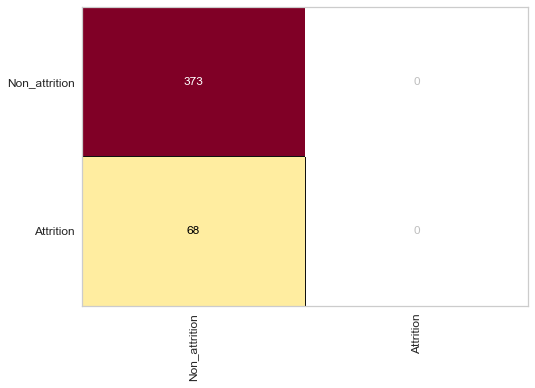

In [31]:
#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(x_train, y_train)
#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(x_test, y_test)

##### After fixing the classes, we can see a good true positive value and true negative value.  The false negative number seems good, but the false positive still seems a bit high

In [32]:
# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

In [33]:
#How did we do?
cm.poof()


<Figure size 576x396 with 0 Axes>

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [34]:
# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


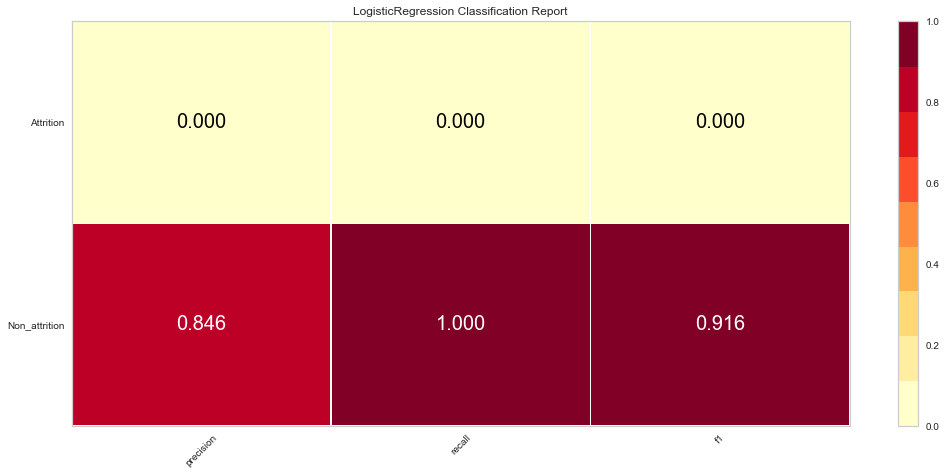

In [35]:
# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)
visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

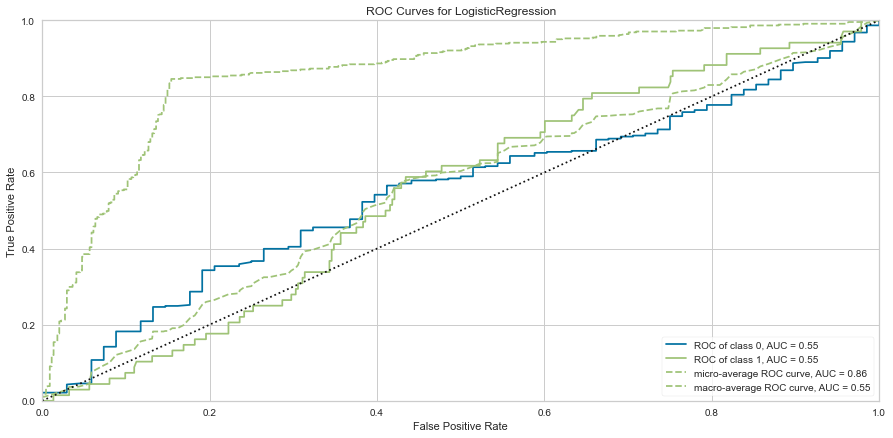

In [36]:
# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model)

visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()


##### With a AUC score of .76, this model could be considered adequate.  

### Conclusion

##### In building this model, I selected variables that had the lowest p values from the p values plot created in the previous milestone.  I split the data into a test and training set. The training set had 860 not attrition records and 169 attrition records.  The training set contained 1029 records while the test set contained 441.  Since I am dealing with categorical values, I chose to do a logistic regression.  The confusion matrix shows 359 True Positives 14 False Positives, 11 True Negatives and 57 False Negatives.  The number of false negatives seems a bit high to me and something I may need to continue to look at.  The classification report shows much higher precision, recall and fit values for predicting Attrition than Not Attrition.  Finally, the ROC curve has an AUC score of .76, which is considered adequate, not excellent.  Given what I have found in this model, I am interested to see if other models might be a better fit.

## Milestone 4 adjustments

#### 1. Corrected classes for confusion matrix above - attrition and non attrition were backwards showing much more attrition than is really happening

#### 2. Handle imbalanced classes

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,RandomizedSearchCV,KFold,cross_val_score,StratifiedKFold
from sklearn.metrics import roc_curve,roc_auc_score,accuracy_score,classification_report,confusion_matrix,recall_score

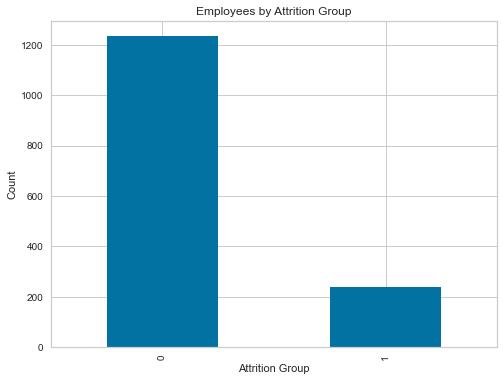

In [38]:
#check imbalanced classes
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
hr_data['Attrition'].value_counts().plot.bar(ylim=0).set(xlabel='Attrition Group', ylabel='Count')
plt.title("Employees by Attrition Group")
plt.show()

In [39]:
from sklearn.metrics import accuracy_score
import numpy as np

In [40]:
hr_data.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [41]:
#Separate input features (x) and target variable (y)
y = hr_data.Attrition
x = hr_data.drop('Attrition', axis = 1)

In [42]:
# Train model
clf_0 = LogisticRegression().fit(X, y)

In [43]:
# predict on training set
pred_y_0 = clf_0.predict(X)

In [44]:
print(accuracy_score(pred_y_0, y))

0.8387755102040816


In [45]:
print(np.unique(pred_y_0))

[0]


The model is predicting more than one class, which is good, and has an accuracy score of .861
I will go ahead and run some steps to handle imbalanced classes

In [46]:
#Separate majority and minority class
hr_data_majority = hr_data[hr_data.Attrition == 0]
hr_data_minority = hr_data[hr_data.Attrition == 1]

In [47]:
from sklearn.utils import resample
# Upsample minority class
hr_data_minority_upsampled = resample (hr_data_minority,
                                      replace = True,
                                      n_samples = 1233,
                                      random_state = 300)

In [48]:
# Combine majority class with upsampled minority class
hr_data_upsampled = pd.concat([hr_data_majority, hr_data_minority_upsampled])


In [49]:
# Display new class counts
hr_data_upsampled.Attrition.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

In [50]:
from imblearn.over_sampling import SMOTE

In [51]:
oversampler=SMOTE(random_state=42)
x_train_smote, y_train_smote = oversampler.fit_resample(x_train,y_train)

In [52]:
cm.fit(x_train_smote, y_train_smote)
#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(x_test, y_test)

0.8458049886621315

In [53]:
import matplotlib.pyplot as plt

In [54]:
# create a function to compare models
def compare(model):
    clf=model
    clf.fit(x_train_smote,y_train_smote)
    pred=clf.predict(x_test)
    
    # Calculating various metrics
    
    acc.append(accuracy_score(pred,y_test))
    prec.append(precision_score(pred,y_test))
    rec.append(recall_score(pred,y_test))
    auroc.append(roc_auc_score(pred,y_test))

In [55]:
# import libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score

In [56]:
# select models to compare
acc=[]
prec=[]
rec=[]
auroc=[]
models=[KNeighborsClassifier(),RandomForestClassifier(),LogisticRegression()]
model_names=['KNeighborsClassifier','RandomForestClassifier','LogisticRegression']

for model in range(len(models)):
    compare(models[model])
    
d={'Modelling Algo':model_names,'Accuracy':acc,'Precision':prec,'Recall':rec,'Area Under ROC Curve':auroc}
resampled_df=pd.DataFrame(d)
resampled_df

,Modelling Algo,Accuracy,Precision,Recall,Area Under ROC Curve
0,KNeighborsClassifier,0.639456,0.382353,0.181818,0.520439
1,RandomForestClassifier,0.712018,0.338235,0.219048,0.542560
2,LogisticRegression,0.596372,0.485294,0.187500,0.527712


In [57]:
def comp_models(resampled_df,metric):
    sns.factorplot(data=resampled_df,x=metric,y='Modelling Algo',size=5,aspect=1.5,kind='bar')
    sns.factorplot(data=resampled_df,y=metric,x='Modelling Algo',size=7,aspect=2,kind='point')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height

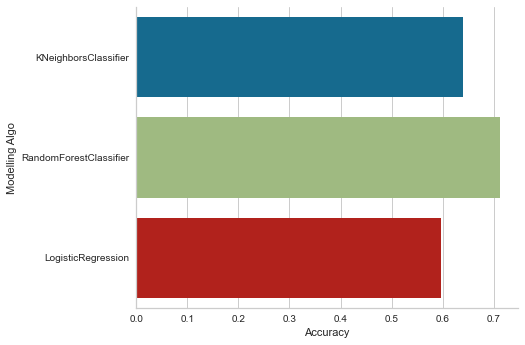

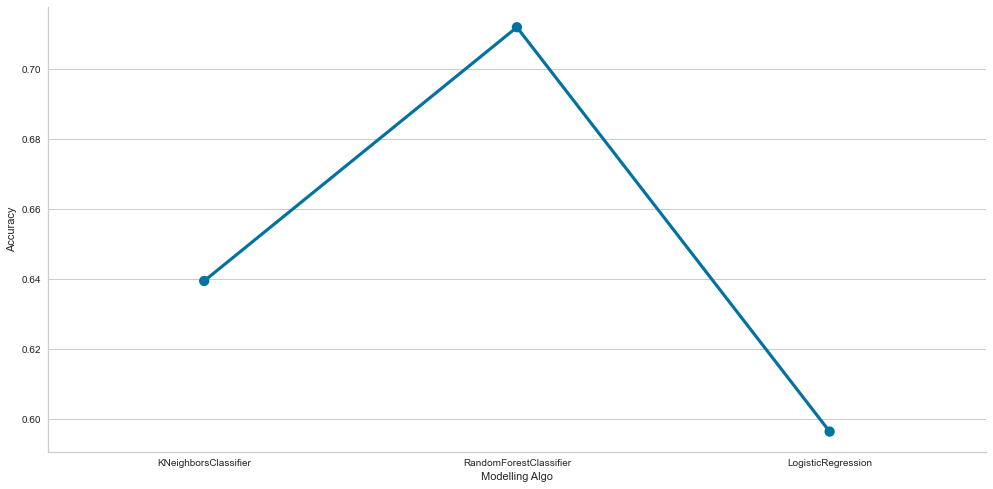

In [58]:

comp_models(resampled_df,'Accuracy')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height

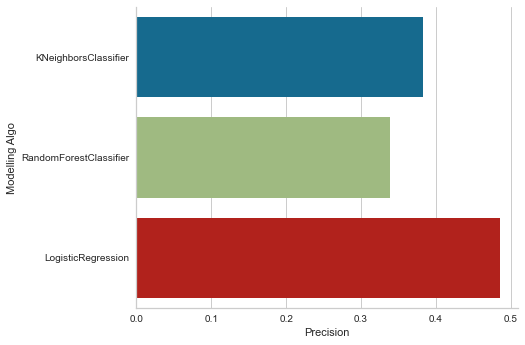

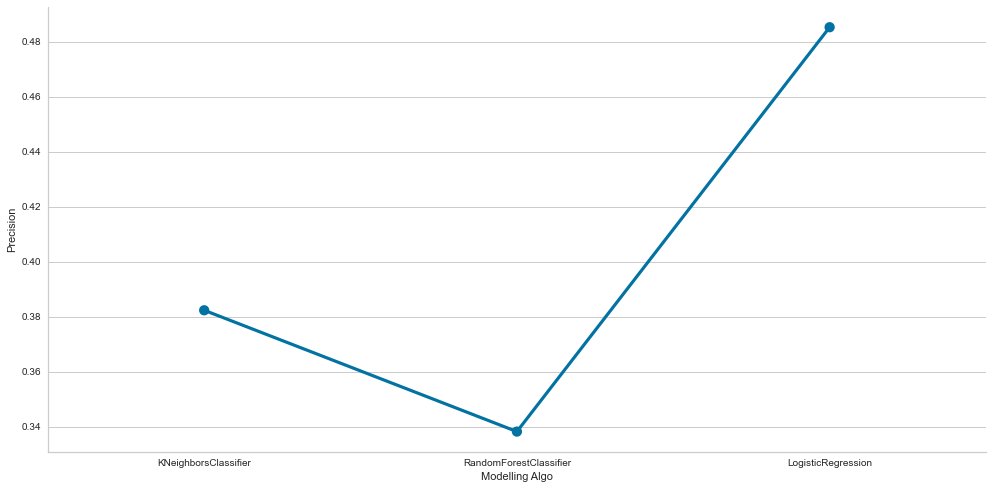

In [59]:
comp_models(resampled_df,'Precision')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height

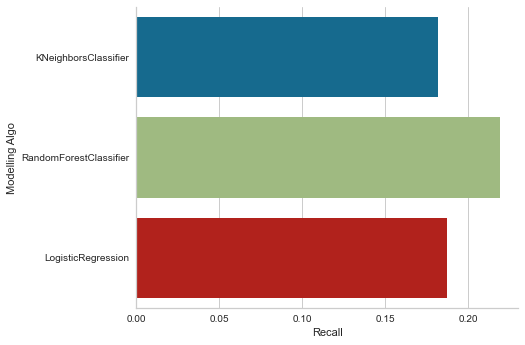

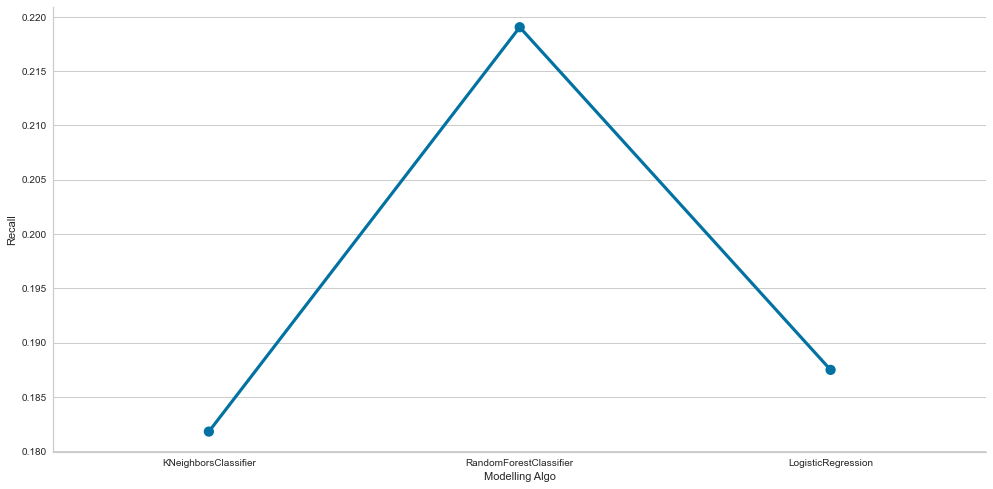

In [60]:
comp_models(resampled_df,'Recall')


/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height

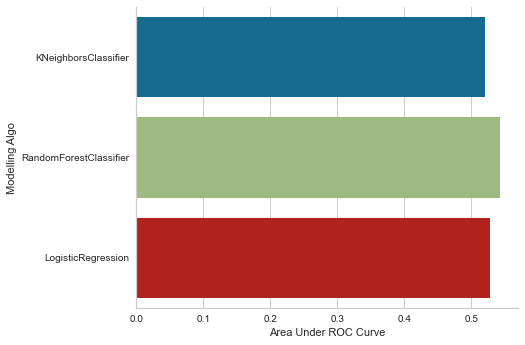

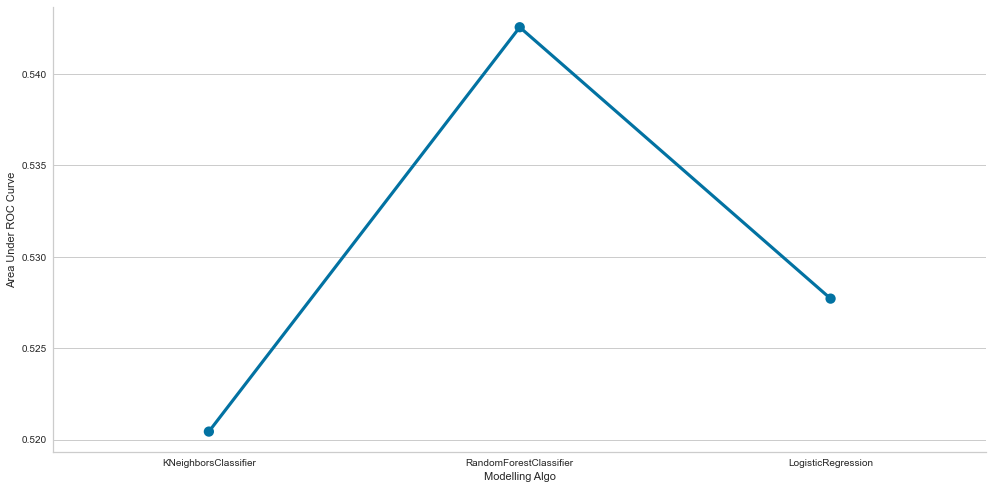

In [61]:
comp_models(resampled_df,'Area Under ROC Curve')


In [62]:
#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(x_train, y_train)
#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(x_train_smote, y_train_smote)

0.5

#### The model is still predicting more than one class and the accuracy has gone up slightly, to .867

#### 3. Run Logistic Regression

In [63]:
import statsmodels.formula.api as smf

In [64]:
formula = 'Attrition ~ JobSatisfaction + JobLevel + JobRole + OverTime + YearsSinceLastPromotion'
model = smf.logit(formula, data=hr_data)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.372998
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1457
Method:                           MLE   Df Model:                           12
Date:                Sat, 05 Jun 2021   Pseudo R-squ.:                  0.1555
Time:                        02:26:31   Log-Likelihood:                -548.31
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 1.280e-36
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -1.8997      0.554     -3.428      0.001      -2.986      -0.813
JobRole[T.2]                1.3105      0.522      2.511      0.012       0.288       2.333
JobRole[T.3]                1.3494      0.433      3.119      0.002       0.501       2.197
JobRole[T.4]                0.0248      0.643      0.039      0.969      -1.236       1.286
JobRole[T.5]                0.0019      0.489      0.004      0.997      -0.957       0.961
JobRole[T.6]               -0.7382      0.835     -0.884      0.377      -2.376       0.899
JobRole[T.7]                0.6211      0.439      1.413      0.158      -0.240       1.482
JobRole[T.8]                1.1000      0.387      2.844      0.004       0.342       1.858
JobRole[T.9]                2.0890      0.479      4.359      0.000       1.150       3.028
JobSatisfaction            -0.3024      0.069     -4.401      0.000      -0.437      -0.168
JobLevel                   -0.2708      0.161     -1.681      0.093      -0.586       0.045
OverTime                    1.5209      0.159      9.587      0.000       1.210       1.832
YearsSinceLastPromotion     0.0381      0.028      1.377      0.168      -0.016       0.092
===========================================================================================
"""

#### We can see again that the low p-value for Job Satisfaction indicates there there is a strong relationship between job satisfaction and attrition. Job role varies by role, so I plan to look up the codes to see what each role is and discuss in my conclusion.  

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
# train model
rfc = RandomForestClassifier(n_estimators=10).fit(x_train, y_train)

# predict on test set
rfc_pred = rfc.predict(x_test)

#accuracy_score(y_val, rfc_pred)
print("Accuracy Score: ", (accuracy_score(y_test, rfc_pred)))

print("F1 Score: ", (f1_score(y_test, rfc_pred)))


print("Recall Score: ", (recall_score(y_test, rfc_pred)))


Accuracy Score:  0.8117913832199547
F1 Score:  0.0879120879120879
Recall Score:  0.058823529411764705
